# Information Flows in Causal Networks

This notebook replicates some examples from [Ay & Polani (2008), "Information Flows in Causal Networks" in Advances in Complex Systems Volume 11, Issue 01](http://www.worldscientific.com/doi/abs/10.1142/S0219525908001465%0A)

In [2]:
from causalinfo import *
from numpy import log2
from numpy.testing import assert_allclose
# You only need this if you want to draw pretty pictures of the Networksa
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

In [3]:
w, x, y, z = make_variables("W X Y Z", 2)
wdist = UniformDist(w)

## Ay & Polani, Example 3

In [4]:
eq1 = Equation('BR', [w], [x, y], equations.branch_same_)
eq2 = Equation('XOR', [x, y], [z], equations.xor_)

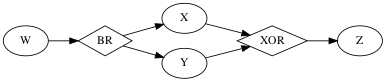

In [5]:
# Build the graph
eg3 = CausalGraph([eq1, eq2])
draw(eg3.full_network)

In [6]:
eg3

In [7]:
m_eg3 = MeasureCause(eg3, wdist)

# See the table on p29a
assert m_eg3.mutual_info(x, y) == 1
assert m_eg3.mutual_info(x, y, w) == 0
assert m_eg3.mutual_info(w, z, y) == 0

assert m_eg3.causal_flow(x, y) == 0
assert m_eg3.causal_flow(x, y, w) == 0
assert m_eg3.causal_flow(w, z, y) == 1

## Ay & Polani, Example 5.1

In [8]:
def copy_first_(i1, i2, o1):
        o1[i1] = 1.0

eq2 = Equation('COPY_FIRST', [x, y], [z], copy_first_)

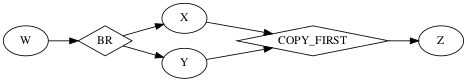

In [9]:
eg51 = CausalGraph([eq1, eq2])
draw(eg51.full_network)

In [10]:
m_eg51 = MeasureCause(eg51, wdist)

# See paragraph at top of page 30
assert m_eg51.mutual_info(x, z, y) == 0
assert m_eg51.causal_flow(x, z, y) == 1
assert m_eg51.causal_flow(x, z) == 1

## Ay & Polani, Example 5.2

In [11]:
def random_sometimes_(i1, i2, o1):
    if i1 != i2:
        o1[:] = .5
    else:
        equations.xor_(i1, i2, o1)

eq2 = Equation('RAND', [x, y], [z], random_sometimes_)

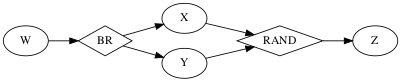

In [12]:
eg52 = CausalGraph([eq1, eq2])
draw(eg52.full_network)

In [13]:
m_eg52 = MeasureCause(eg52, wdist)

# See pg 30
expected = 3.0 / 4.0 * log2(4.0 / 3.0)
assert_allclose(m_eg52.causal_flow(x, z, y), expected)